In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

In [3]:
# Loading All Cpx
All_Cpx=pd.read_excel('Cpx-Data.xlsx', sheet_name='All_Cpx_(not_all_PTs)')
# Loading all the Cpx that barometry was performed on
All_Cpx_PT=pd.read_excel('Cpx-Data.xlsx', sheet_name='Cpx_Liq_For_Thermobarometry')
# All Cpx with errors (not all PTs)
Cpx_Errors_Luo= pd.read_excel('Cpx-Data.xlsx', sheet_name='Cpx_all_Errors_Luo')
Cpx_Errors_Che= pd.read_excel('Cpx-Data.xlsx', sheet_name='Cpx_all_Errors_Che')
Cpx_Errors_PT=pd.read_excel('Cpx-Data.xlsx', sheet_name='Cpx_Liq_Witherrors')

In [4]:
np.mean(All_Cpx_PT['Na2O_Cpx_Err_Estimated'])

25.847821655837897

In [5]:
np.median(All_Cpx_PT['Na2O_Cpx_Err_Estimated'])

26.2885875643532

In [6]:
np.max(All_Cpx_PT['Na2O_Cpx_Err_Estimated'])

53.4056440024626

In [7]:
np.min(All_Cpx_PT['Na2O_Cpx_Err_Estimated'])

10.7722271308338

In [8]:
np.mean(All_Cpx_PT['Na2O_Cpx'])

0.07202631578947366

In [9]:
np.median(All_Cpx_PT['Na2O_Cpx'])

0.06

In [10]:
cpx_comps_Pt=pt.calculate_clinopyroxene_components(cpx_comps=All_Cpx_PT)
print(sum(cpx_comps_Pt['Jd_from 0=Na, 1=Al']==0))
print(sum(cpx_comps_Pt['Jd_from 0=Na, 1=Al']==1))
All_Cpx_PT['Sample_ID_Cpx'].loc[cpx_comps_Pt['Jd_from 0=Na, 1=Al']==1]

75
1


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


31    042GP-002-py-10-core
Name: Sample_ID_Cpx, dtype: object

In [11]:
np.quantile(All_Cpx_PT['Na2O_Cpx'], 0.95)

0.1325

In [12]:
Cpx_Errors_Che.head()

,Filename,Spotsize,BeamCurr,AccVolt,Comment,No.,Phase,SiO2,TiO2,Al2O3,...,TiO2_Err,Al2O3_Err,FeO_Err,MnO_Err,MgO_Err,CaO_Err,Na2O_Err,K2O_Err,Cr2O3.1,P2O5.1
0,B2(2)_0004_QNT,1um,30nA,15kV,B2-10,1,augite,47.924,1.391,1.632,...,1.87,1.72,0.53,6.34,0.66,0.56,31.31,100.00,9.25,64.95
1,NaN,1um,30nA,15kV,B2-11,2,augite,46.599,1.361,1.396,...,1.89,1.90,0.47,5.75,1.36,0.55,47.13,100.00,14.95,80.31
2,NaN,1um,30nA,15kV,B2-12,3,augite,47.797,1.307,1.623,...,1.91,1.73,0.50,6.14,0.69,0.60,29.84,203.08,7.96,100.00
3,NaN,1um,30nA,15kV,B2-13,4,augite,46.497,1.445,2.001,...,1.82,1.54,0.48,5.92,0.93,0.58,66.28,100.00,9.98,100.00
4,NaN,1um,30nA,15kV,B2-14,5,augite,48.364,1.788,2.194,...,1.61,1.47,0.55,6.56,0.54,0.61,33.01,235.13,5.70,30.77


In [13]:
Cpx_Errors_PT.head()

,Unnamed: 0,Sample_ID_Cpx,Ref,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,0,23_1-04,THIStudy,47.065,2.770,4.349,17.195,0.289,9.467,17.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,% errors
1,1,CE5-27-2,THIStudy,47.080,2.707,4.159,16.639,0.290,10.057,16.688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CE5-27-3,THIStudy,45.937,3.624,4.969,16.558,0.284,9.725,16.924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5-28-1-06,THIStudy,47.257,2.983,5.248,14.082,0.234,11.193,17.262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5-28-1-08,THIStudy,47.147,3.061,5.006,13.957,0.222,11.442,17.131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Lets fit a polynomail through all the data we do have
Errors_Combo_Luo=pd.DataFrame(data={'Na2O_Val':Cpx_Errors_Luo['Na2O'],
                                    'Na2O_Err': Cpx_Errors_Luo['Na'],
                                    })

Errors_Combo_Che=pd.DataFrame(data={'Na2O_Val':Cpx_Errors_Che['Na2O'],
                                    'Na2O_Err': Cpx_Errors_Che['Na2O_Err'],
                                    })

# This removes the ones off the line
filt=~((combo['Na2O_Val']<0.04) & (combo['Na2O_Err']<30))
filt2=~((combo['Na2O_Val']<0.02) & (combo['Na2O_Err']<60))

combo=pd.concat([Errors_Combo_Luo, Errors_Combo_Che]).reset_index(drop=True)
combo=combo.loc[(combo['Na2O_Err']<100)&(filt&filt2)]


NameError: name 'combo' is not defined

In [15]:
from scipy.optimize import curve_fit

# Define the function to be fitted
def model_func(x, ps_cps, c_standard, b_cps, t):
    return np.sqrt(((x*ps_cps)/c_standard + 2*b_cps)/(((x*ps_cps)/c_standard)**2*t))

# Define your input data
x_data = combo['Na2O_Val'] # your data for X
y_data = combo['Na2O_Err'] # your data for y

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_func, x_data, y_data)

# Generate new data for prediction
x_new = np.linspace(min(x_data), max(x_data), 101)
y_new = model_func(x_new, *popt)
Pred_PT_Err=model_func(All_Cpx_PT['Na2O_Cpx'], *popt)
Pred_ones_witherrs=model_func(Cpx_Errors_PT['Na2O_Cpx'], *popt)


NameError: name 'combo' is not defined

In [16]:
filt=(combo['Na2O_Val']<0.04) & (combo['Na2O_Err']<30)
filt2=(combo['Na2O_Val']<0.02) & (combo['Na2O_Err']<60)
plt.plot(combo['Na2O_Val'], combo['Na2O_Err'], 'ob')

plt.plot(combo['Na2O_Val'].loc[filt], combo['Na2O_Err'].loc[filt], 'or')
plt.plot(x_new, y_new, '-r')

NameError: name 'combo' is not defined

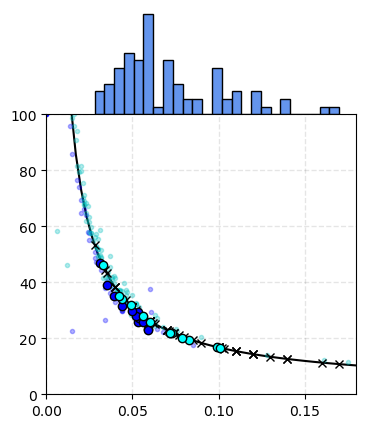

In [161]:
## Making a histogram of Na2O contents first
b=1
#fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,5))

fig, ((ax1h),(ax1)) = plt.subplots(2, 1, figsize=(4,5),gridspec_kw={'height_ratios': [1.5, 4]})
plt.subplots_adjust(wspace=0, hspace=0)
ax1.plot(x_new, y_new, '-k')

# All_Cpx_Na2O_Sorted=np.sort(All_Cpx['Na2O_Cpx'])
# All_Cpx_PT_Na2O_Sorted=np.sort(All_Cpx_PT['Na2O_Cpx'])
# ax3.step(np.concatenate([All_Cpx_Na2O_Sorted, All_Cpx_Na2O_Sorted[[-1]]]),
#          np.arange(All_Cpx_Na2O_Sorted.size+1)/All_Cpx_Na2O_Sorted.size, color='grey', linewidth=b)
# ax3.step(np.concatenate([All_Cpx_PT_Na2O_Sorted, All_Cpx_PT_Na2O_Sorted[[-1]]]),
#          np.arange(All_Cpx_PT_Na2O_Sorted.size+1)/All_Cpx_PT_Na2O_Sorted.size, color='red', linewidth=b)
# ax2=ax1.twinx()
ax1h.hist(All_Cpx_PT['Na2O_Cpx'], bins=25, ec='k', facecolor='cornflowerblue')

# Errors

ax1.plot(Cpx_Errors_Che['Na2O'], Cpx_Errors_Che['Na2O_Err'], '.b', alpha=0.3)
ax1.plot(Cpx_Errors_Luo['Na2O'], Cpx_Errors_Luo['Na'], '.c', alpha=0.3)

notLuoChe=~(All_Cpx_PT['References'].str.contains('Luo') |All_Cpx_PT['References'].str.contains('Che'))
ax1.plot(All_Cpx_PT['Na2O_Cpx'].loc[notLuoChe], Pred_PT_Err.loc[notLuoChe], 'xk')
Luo=Cpx_Errors_PT['Ref']=='THIStudy'	
Che=Cpx_Errors_PT['Ref']=='Che'	
ax1.plot(Cpx_Errors_PT['Na2O_Cpx'].loc[Che], 
         Cpx_Errors_PT['Na2O_Cpx_Err'].loc[Che], 'ok', mfc='blue')
ax1.plot(Cpx_Errors_PT['Na2O_Cpx'].loc[Luo], 
         Cpx_Errors_PT['Na2O_Cpx_Err'].loc[Luo], 'ok', mfc='cyan')

ax1.set_ylim([0, 100])
ax1.set_xlim([0, 0.3])
ax1h.grid(axis='y', linestyle='--', linewidth=0.5)
ax1h.axes.get_xaxis().set_visible(False)
ax1h.axes.get_yaxis().set_visible(False)
ax1.set_xlim([0, 0.18])
ax1h.set_xlim([0, 0.18])
ax1h.axis("off")
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)

fig.savefig('PT_Errors_All.png', dpi=300, transparent=True)

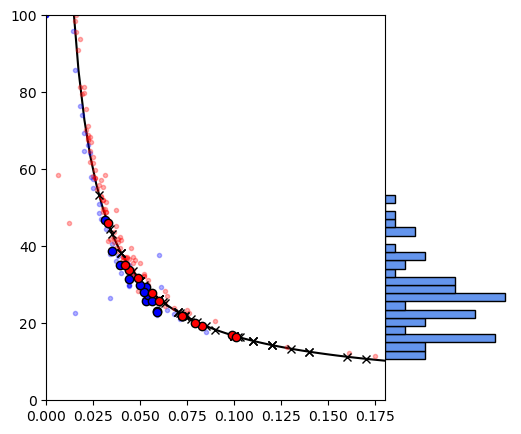

In [163]:
## Making a histogram of Na2O contents first
b=1
#fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,5))
fig, ((ax1),(ax1h)) = plt.subplots(1, 2, figsize=(6,5),gridspec_kw={'width_ratios': [4, 1.5]})
#fig, ((ax1h),(ax1)) = plt.subplots(2, 1, figsize=(6,5),gridspec_kw={'height_ratios': [1.5, 4]})
plt.subplots_adjust(wspace=0, hspace=0)
ax1.plot(x_new, y_new, '-k')

# All_Cpx_Na2O_Sorted=np.sort(All_Cpx['Na2O_Cpx'])
# All_Cpx_PT_Na2O_Sorted=np.sort(All_Cpx_PT['Na2O_Cpx'])
# ax3.step(np.concatenate([All_Cpx_Na2O_Sorted, All_Cpx_Na2O_Sorted[[-1]]]),
#          np.arange(All_Cpx_Na2O_Sorted.size+1)/All_Cpx_Na2O_Sorted.size, color='grey', linewidth=b)
# ax3.step(np.concatenate([All_Cpx_PT_Na2O_Sorted, All_Cpx_PT_Na2O_Sorted[[-1]]]),
#          np.arange(All_Cpx_PT_Na2O_Sorted.size+1)/All_Cpx_PT_Na2O_Sorted.size, color='red', linewidth=b)
# ax2=ax1.twinx()
ax1h.hist(Pred_PT_Err, bins=20, ec='k', facecolor='cornflowerblue', orientation='horizontal')

# Errors

ax1.plot(Cpx_Errors_Che['Na2O'], Cpx_Errors_Che['Na2O_Err'], '.b', alpha=0.3)
ax1.plot(Cpx_Errors_Luo['Na2O'], Cpx_Errors_Luo['Na'], '.r', alpha=0.3)

notLuoChe=~(All_Cpx_PT['References'].str.contains('Luo') |All_Cpx_PT['References'].str.contains('Che'))
ax1.plot(All_Cpx_PT['Na2O_Cpx'].loc[notLuoChe], Pred_PT_Err.loc[notLuoChe], 'xk')
Luo=Cpx_Errors_PT['Ref']=='THIStudy'	
Che=Cpx_Errors_PT['Ref']=='Che'	
ax1.plot(Cpx_Errors_PT['Na2O_Cpx'].loc[Che], 
         Cpx_Errors_PT['Na2O_Cpx_Err'].loc[Che], 'ok', mfc='blue')
ax1.plot(Cpx_Errors_PT['Na2O_Cpx'].loc[Luo], 
         Cpx_Errors_PT['Na2O_Cpx_Err'].loc[Luo], 'ok', mfc='red')

ax1.set_ylim([0, 100])
ax1.set_xlim([0, 0.3])

ax1h.axes.get_xaxis().set_visible(False)
#ax1h.axes.get_yaxis().set_visible(False)
ax1.set_xlim([0, 0.18])
#ax1h.set_xlim([0, 0.18])
ax1.set_ylim([0, 100])
ax1h.set_ylim([0, 100])
ax1h.axis("off")
fig.savefig('SecondAxis.png', dpi=200, transparent=True)

(array([ 2.,  3.,  6.,  8.,  2.,  3.,  7.,  3.,  2., 12.,  5.,  8.,  1.,
         1.,  2.,  1.,  4.,  0.,  0.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([10.77222713, 12.47756381, 14.18290048, 15.88823716, 17.59357383,
        19.29891051, 21.00424718, 22.70958385, 24.41492053, 26.1202572 ,
        27.82559388, 29.53093055, 31.23626723, 32.9416039 , 34.64694058,
        36.35227725, 38.05761393, 39.7629506 , 41.46828728, 43.17362395,
        44.87896063, 46.5842973 , 48.28963398, 49.99497065, 51.70030733,
        53.405644  ]),
 <BarContainer object of 25 artists>)

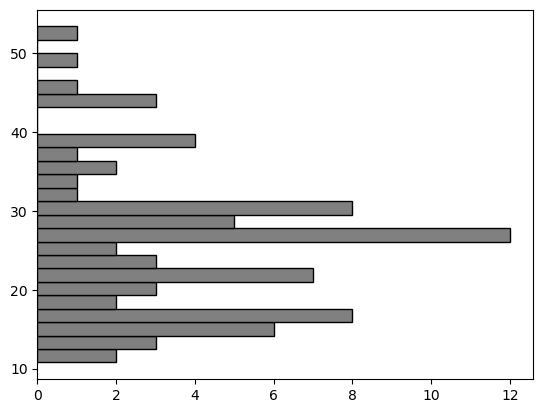

In [138]:
plt.hist(Pred_PT_Err, bins=25, ec='k', facecolor='grey', orientation='horizontal')

In [159]:
## Lets save errors to copy elsewhere
Pred_ones_witherrs.to_clipboard(excel=True)